Found 26 images belonging to 4 classes.
Found 5 images belonging to 4 classes.
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.3318 - accuracy: 0.3846 - val_loss: 1.3536 - val_accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 1s 739ms/step - loss: 1.2364 - accuracy: 0.3846 - val_loss: 1.4759 - val_accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 1.1951 - accuracy: 0.3846 - val_loss: 1.5815 - val_accuracy: 0.4000
Epoch 4/10
1/1 [==============================] - 1s 777ms/step - loss: 1.1960 - accuracy: 0.3846 - val_loss: 1.5783 - val_accuracy: 0.2000
Epoch 5/10
1/1 [==============================] - 1s 737ms/step - loss: 1.2093 - accuracy: 0.4231 - val_loss: 1.4833 - val_accuracy: 0.2000
Epoch 6/10
1/1 [==============================] - 1s 728ms/step - loss: 1.1867 - accuracy: 0.3846 - val_loss: 1.4001 - val_accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - 1s 970ms/step - loss: 1.1578 - accura

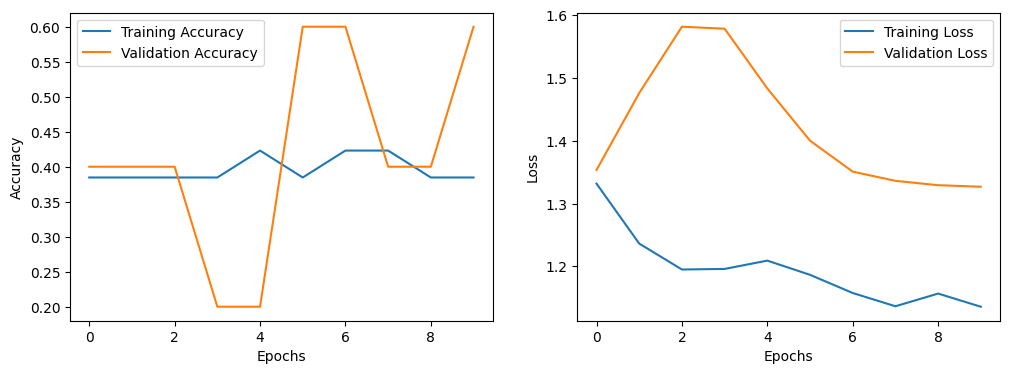

Found 9 images belonging to 4 classes.
1/1 [==============================] - 0s 117ms/step


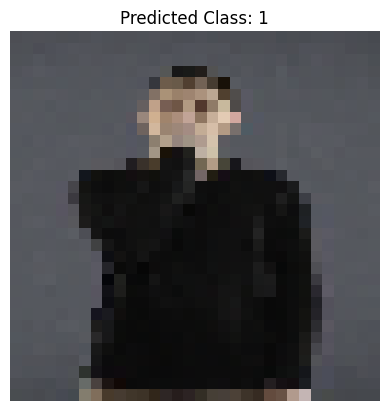

안녕하세요.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np

# 데이터 경로 설정
train_data_dir = '/content/drive/MyDrive/project_final/train'
val_data_dir = '/content/drive/MyDrive/project_final/test'
real_data_dir = '/content/drive/MyDrive/project_final/real_data'  # 실제 데이터 디렉토리

image_size = (32, 32)
batch_size = 32

# 데이터 증강 및 전처리
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,  # 추가: 이미지 회전 최대 각도
    width_shift_range=0.2,  # 추가: 가로 이동 범위
    height_shift_range=0.2,  # 추가: 세로 이동 범위
    brightness_range=[0.8, 1.2],  # 추가: 밝기 조절 범위
    fill_mode='nearest'  # 추가: 이미지를 회전 또는 이동할 때 채우는 방법
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse'
)

# 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# 훈련 데이터에 대한 정확도 및 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 임의의 실제 데이터로 예측
real_datagen = ImageDataGenerator(rescale=1./255)

real_generator = real_datagen.flow_from_directory(
    real_data_dir,
    target_size=image_size,
    batch_size=1,  # 배치 크기를 1로 설정하여 하나의 이미지씩 가져옴
    class_mode='sparse',
    shuffle=False  # 셔플 비활성화
)

# 임의의 이미지와 레이블을 선택
random_index = random.randint(0, len(real_generator) - 1)
sample_image, sample_label = real_generator[random_index]

# 모델 예측
prediction = model.predict(sample_image)
predicted_class = tf.argmax(prediction, axis=1).numpy()

# 선택한 이미지를 시각화
plt.imshow(np.squeeze(sample_image))
plt.title(f"Predicted Class: {int(predicted_class) + 1}")
plt.axis('off')
plt.show()

if predicted_class == 0 :
  print("안녕하세요.")
elif predicted_class == 1 :
  print("사랑해요.")
elif predicted_class == 2 :
  print("괜찮아요. 사람은 누구나 실수할 수 있습니다.")
elif predicted_class == 3 :
  print("당신은 무엇을 공부하시나요?")
else :
  print("분류할 수 있는 클래스가 없습니다.")